## Do first babies arrive late?

From [Think Stats Probability and Statistics for Programmers](https://greenteapress.com/wp/think-stats-2e/) by Allen B. Downey

__Anecdotical evidence__

“My two friends that have given birth recently to their first babies, BOTH went almost 2 weeks overdue before going into
labour or being induced.”

“My first one came 2 weeks late and now I think the second one
is going to come out two weeks early!!”

“I don’t think that can be true because my sister was my
mother’s first and she was early, as with many of my cousins.”

__Small number of observations:__ If the gestation period is longer for first babies, the difference is probably small compared to the natural variation. In that case, we might have to compare a large number of pregnancies to be sure that a difference exists.

__Selection bias:__ People who join a discussion of this question might be interested because their first babies were late. In that case the process of selecting data would bias the results.

__Confirmation bias:__ People who believe the claim might be more likely to
contribute examples that confirm it. People who doubt the claim are
more likely to cite counterexamples.

__Inaccuracy:__ Anecdotes are often personal stories, and often misremembered, misrepresented, repeated inaccurately, etc.

__So how can we do better?__

__DATA:__ U.S. Centers for Disease Control and Prevention (CDC) have
conducted the National Survey of Family Growth (NSFG)

In [1]:
import numpy as np
import survey

table = survey.Pregnancies()
table.ReadRecords()
print ('Number of pregnancies', len(table.records))

Number of pregnancies 13593


In [3]:
for rec in table.records[:7]:
    outcome = rec.outcome # is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth
    birthord = rec.birthord # is the integer birth order of each live birth; for example, the code for a first child is 1. For outcomes other than live birth, this field is blank.
    caseid = rec.caseid #the integer ID of the respondent
    nbrnaliv = rec.nbrnaliv
    babysex = rec.babysex #1 or 2
    prglength = rec.prglength # pregnancy length in weeks
    print(outcome, birthord, caseid, nbrnaliv, babysex, prglength)
print(len(table.records))

1 1 1 1 1 39
1 2 1 1 2 39
1 1 2 3 1 39
1 2 2 1 2 39
1 3 2 1 2 39
1 1 6 1 1 38
1 2 6 1 2 40
13593


__Classical histogram__

Example

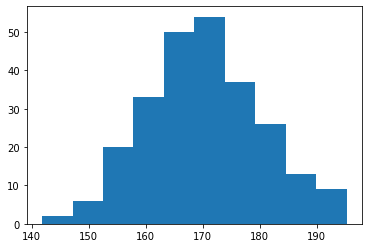

In [4]:
import matplotlib.pyplot as plt
x = np.random.normal(170, 10, 250)

plt.hist(x)
plt.show()


In [3]:
import matplotlib.pyplot as plt
# histogram with controlled number of bins; returns the coordinates of the points to be visualized
# plot the histogram with built-in .hist() and return the array of data
def hist_my_rectangle(array, n_bins = 10):
    res = plt.hist(array, n_bins)
    xx = res[1] #xx[] gives the endpoints of the bins, we need their centers
    y = res[0] #value of the histogram
    # xx -> x; 
    # ATTENTION len(xx) - len(y) + 1
    x = [(xx[i] + xx[i+1]) / 2 for i in range(len(xx)-1)]
        
    return x, y
    

In [11]:
import math
def hist_my(array, n_bins = 10):
    array = np.array(array)
    arr_min = min(array)
    arr_max = max(array)
    if n_bins <= 0:
        raise Exception('At least 1 bin required')
    else:
        x = []
        y = []
        gap = (arr_max - arr_min) / n_bins
        for i in range(n_bins):
            x.append(arr_min + (0.5 + i) * gap) #define x-values of the bin, which are in the middle of each
            y.append(0) #y-values are set to 0 at the beginning
        for arr in array:
            cur = int(math.floor((arr - arr_min) / gap)) #find the bin for the current values
            if cur >= 0 and cur < n_bins:
                y[cur] += 1 #increase the quantity corresponding to the bin by 1
    return x, y

In [7]:
#Empirical probability density function
import math

def pdf_my(array: list, n_bins = 10, arr_min = [], arr_max = []):
    array = np.array(array)
    if np.size(arr_min) == 0:
        arr_min = min(array)
    if np.size(arr_max) == 0:
        arr_max = max(array)
    if n_bins <= 0:
        raise Exception('At least 1 bin required')
    else:
        x = []
        y = []
        gap = (arr_max - arr_min) / n_bins
        for i in range(n_bins):
            x.append(arr_min + (0.5 + i) * gap)
            y.append(0)
        n_els = 0 # number of elements; the histogram will be constructed for them
        for arr in array:
            cur = int(math.floor((arr - arr_min) / gap))
            if cur >= 0 and cur < n_bins:
                y[cur] += 1
                n_els += 1
        if n_els > 0:
            for cur in range(len(y)):
                y[cur] = y[cur] / n_els
    return x, y

> You can indicate a required variable type in the function. The above code uses `array : list`, which declares that the type of `array` is list (in fact, list-like; f.e., `np.array` type matches this definition). See the example below

In [8]:
import numpy as np
def test(x: list):
    return np.mean(x)

x = [1, 2]
print(test(np.array(x)))

1.5


# Histograhm of the weeks of pregnancy

## Compare the default histogram with a simple graph, where the points correspond to the middle of the rectangles

* Think, whether we can observe two histograms displayed in this manner

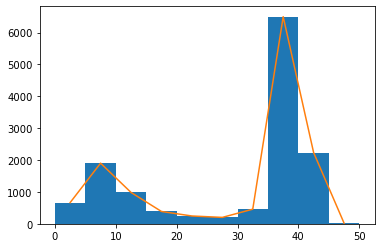

In [9]:
import matplotlib.pyplot as plt
from stat_my import hist_my_rectangle
prglength = []
for rec in table.records:
    prglength.append(rec.prglength)
x, y = hist_my_rectangle(prglength, 10)
plt.plot(x, y)
plt.show()


## Histogram with just points without rectangles

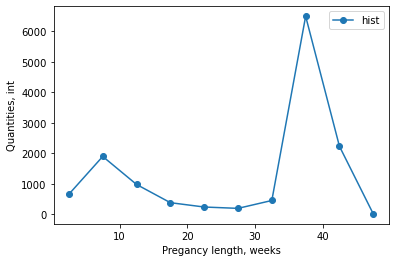

In [12]:
import matplotlib.pyplot as plt
prglength = []
for rec in table.records:
    prglength.append(rec.prglength)
x, y = hist_my(prglength, 10)
plt.plot(x, y, marker = 'o', label = 'hist')
plt.legend()
plt.xlabel('Pregancy length, weeks')
plt.ylabel('Quantities, int')
plt.show()


## Split a single database
distinguishing between the first and the other babies

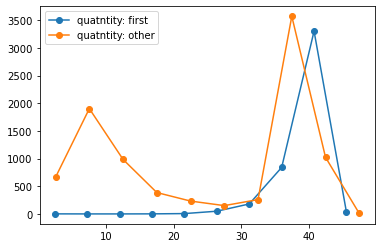

In [13]:
prglength_first = []
prglength_other = []
for rec in table.records:
    if rec.birthord == 1: # first baby
        prglength_first.append(rec.prglength)
    else:
        prglength_other.append(rec.prglength)

x_first, y_first = hist_my(prglength_first, 10)
plt.plot(x_first, y_first, marker = 'o', label = 'quatntity: first')
x_other, y_other = hist_my(prglength_other, 10)
plt.plot(x_other, y_other, marker = 'o', label = 'quatntity: other')
plt.legend()
plt.show()


## From Histogram to Probability Density Function

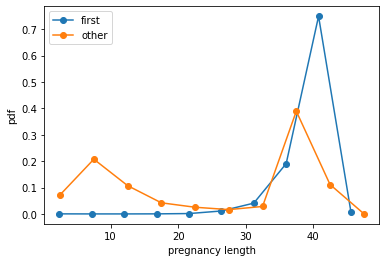

In [17]:
import importlib
#import stat_my
#importlib.reload(stat_my) #to reload module (if required) uncomment this and previous lines
from stat_my import pdf_my
prglength_first = []
prglength_other = []
for rec in table.records:
    if rec.birthord == 1:
        prglength_first.append(rec.prglength)
    else:
        prglength_other.append(rec.prglength)

x_first, y_first = pdf_my(prglength_first, 10)
plt.plot(x_first, y_first, marker = 'o', label = 'first')
x_other, y_other = pdf_my(prglength_other, 10)
plt.plot(x_other, y_other, marker = 'o', label = 'other')
plt.xlabel('pregnancy length')
plt.ylabel('pdf')
plt.legend()
plt.show()


## Attention: outliers
* Are we interested in the large yellow values at the left?
* Are we interested in the values at the left at all?

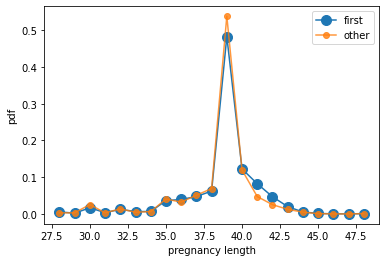

In [19]:
week_first = 27.5
week_last = 48.5
n_bins = int(week_last - week_first)
prglength_first = []
prglength_other = []
for rec in table.records:
    if rec.birthord == 1:
        prglength_first.append(rec.prglength)
    else:
        prglength_other.append(rec.prglength)

x_first, y_first = pdf_my(prglength_first, n_bins, week_first, week_last)
plt.plot(x_first, y_first, marker = 'o', label = 'first', markersize = 10)
x_other, y_other = pdf_my(prglength_other, n_bins, week_first, week_last)
plt.plot(x_other, y_other, marker = 'o', label = 'other', alpha = 0.8) # alpha stays for transperancy
plt.xlabel('pregnancy length')
plt.ylabel('pdf')
plt.legend()
plt.show()


In [20]:
print('first baby mean pregnancy:', np.dot(x_first, y_first)) #scalar product
print('the other baby mean pregnancy:', np.dot(x_other, y_other))
print('difference', np.dot(x_first, y_first) - np.dot(x_other, y_other))


first baby mean pregnancy: 38.713013698630135
the other baby mean pregnancy: 38.47810965630114
difference 0.2349040423289921


The numbers contain too many floating digits. You can control the output with the second argument of `np.round()`.

In [22]:
digit_float = 2
print('first baby mean pregnancy:', np.round(np.dot(x_first, y_first), digit_float)) #scalar product
print('the other baby mean pregnancy:', np.round(np.dot(x_other, y_other), digit_float))
print('difference', np.round(np.dot(x_first, y_first) - np.dot(x_other, y_other), digit_float))


first baby mean pregnancy: 38.71
the other baby mean pregnancy: 38.48
difference 0.23


# Conclusion

* Can we draw a conclusion?

* Is the found difference signicant?

## Some words about samples

(array([  2.,   0.,   0.,   0.,   0.,   3.,   1.,   0.,   3.,   1.,   4.,
          2.,   5.,   5.,   6.,   6.,   7.,  12.,  13.,  21.,  18.,  33.,
         30.,  37.,  46.,  59.,  57.,  73.,  86.,  84.,  88., 107., 116.,
        140., 148., 137., 181., 202., 192., 249., 240., 254., 267., 225.,
        308., 267., 286., 296., 330., 294., 317., 309., 314., 282., 295.,
        293., 237., 274., 252., 248., 217., 201., 209., 160., 174., 149.,
        153., 129., 114., 103.,  88.,  74.,  77.,  62.,  59.,  39.,  41.,
         27.,  35.,  24.,  19.,  13.,  15.,  11.,   9.,   4.,   9.,   5.,
          4.,   2.,   1.,   2.,   2.,   2.,   2.,   0.,   1.,   1.,   0.,
          1.]),
 array([-3.81760177e+00, -3.74121975e+00, -3.66483773e+00, -3.58845570e+00,
        -3.51207368e+00, -3.43569166e+00, -3.35930964e+00, -3.28292761e+00,
        -3.20654559e+00, -3.13016357e+00, -3.05378155e+00, -2.97739953e+00,
        -2.90101750e+00, -2.82463548e+00, -2.74825346e+00, -2.67187144e+00,
        -2.595

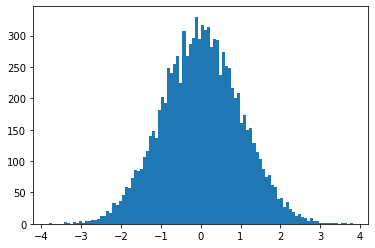

In [14]:
from numpy import random
x = random.normal(0, 1, 10000)
plt.hist(x, 100)

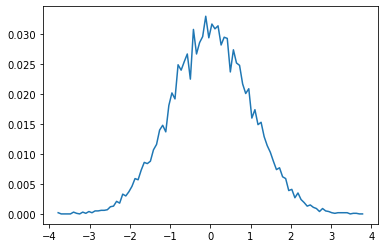

In [15]:
u, v = pdf_my(x, 100)
plt.plot(u, v)

In [18]:
np.mean(x), np.std(x)

(-0.0025442338278289997, 1.0073146037788052)